In [1]:
# http://cs231n.github.io/python-numpy-tutorial/#numpy
# https://chrisalbon.com/python/basics/generating_random_numbers_with_numpy/

import numpy as np
import matplotlib.pyplot as plt
import time

# 1. Finding a convenient way to define a random mini-batch

In [2]:
a = np.random.random((16, 2))

start1 = time.time()
numrows = np.size(a, 0)
numcols = np.size(a, 1)
end1 = time.time()

In [3]:
start2 = time.time()
batch_s = 4
i = 0
neurows = numrows
while (numrows / batch_s) != (numrows // batch_s):
    numrows = numrows - i
    i += 1
end2 = time.time()
print(numrows)
print(numrows / batch_s)

16
4.0


In [4]:
batches = np.arange(numrows).reshape(batch_s, (numrows // batch_s))
i = 0
while (i < (numrows // batch_s)):
    print(a[batches[i]])
    i = i + 1

[[0.87767567 0.36408295]
 [0.8873469  0.15094616]
 [0.15194528 0.69092228]
 [0.48528166 0.52541072]]
[[0.40031543 0.94615827]
 [0.28383845 0.26804516]
 [0.46457177 0.983427  ]
 [0.45254976 0.84792547]]
[[0.2340468  0.09924119]
 [0.5477691  0.69808675]
 [0.6159276  0.2428132 ]
 [0.77449724 0.53017806]]
[[0.84740934 0.91768627]
 [0.16231866 0.71670216]
 [0.20078713 0.44609015]
 [0.09469119 0.18087668]]


[[[0.46457177 0.77449724]]

 [[0.983427   0.71670216]]]


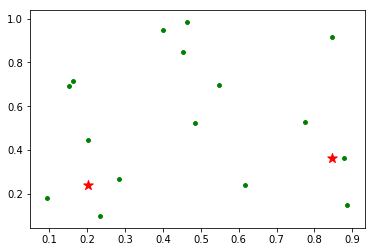

In [5]:
start3 = time.time()
f1= a[:, 0]
f2= a[:, 1]

plt.scatter(f1, f2, c='green', s=15)

X = (list(zip(f1, f2)))

# centroid initialization
k=2
c1 = np.random.choice(f1, size=k)
c2 = np.random.choice(f2, size=k)

plt.scatter(c1, c2, marker='*',c='red',s=100)

centroid_array = np.array([[np.random.choice(f1, size=k)], 
                           [np.random.choice(f2, size=k)]])
end3 = time.time()

print (centroid_array)

In [6]:
start4 = time.time()
def dist(cell_loc, cluster_number):

    return np.linalg.norm(a[cell_loc, :] - centroid_array[cluster_number - 1, :])

def assign_centroids(a_array):
    global nearest_centroid
    z = 0
    nearest_centroid = np.zeros([numrows, 1])
    
    # Loop over all datapoints
    while z < a_array.shape[0]:
        sml_distance = -1

        # Loop over every centroid
        j = 1
        while j <= k:

            if sml_distance == -1 or dist(z, j) < sml_distance:
                sml_distance = dist(z, j)
                nearest_centroid[z, 0] = j
            j += 1
        z += 1
end4 = time.time()

In [17]:
start5 = time.time()
n_iterations = (numrows // batch_s)
v = np.zeros((k, 1))
j = 1
ctrnew = centroid_array
while (j <= n_iterations):
    
        batch = (a[batches[j-1]])
        
        assign_centroids(batch)
        z = 0
        
        while (z < batch_s):
            c = ctrnew[int(nearest_centroid[i, 0])-1, :]
            v[int((nearest_centroid[i, 0]-1)), 0] =  int(v[int((nearest_centroid[i, 0]-1)), 0]) + 1
            n = 1/v[int((nearest_centroid[i, 0]-1)), 0]
            ctrnew[int(nearest_centroid[i, 0])-1, :] = c * (1-n) + a[i, :] * n
            z+=1
        j+=1
        
centroid_array = ctrnew
assign_centroids(a)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
print("\nMINI-BATCH:")
print("\ngroup 4_1 algorithm:")
end5 = time.time()
print((end1 - start1) + (end2 - start2) + (end3 - start3) + (end4 - start4) + (end5 - start5))


MINI-BATCH:

group 4_1 algorithm:
0.04285788536071777


In [18]:
ctrnew

array([[[0.46457177, 0.77449724]],

       [[0.40031543, 0.94615827]]])

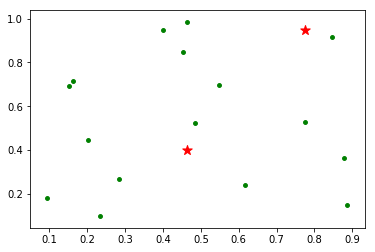

In [9]:
c3 = ctrnew[0, :]
c4 = ctrnew[1, :]

plt.scatter(f1, f2, c='green', s=15)

X = (list(zip(f1, f2)))

plt.scatter(c3, c4, marker='*',c='red',s=100)

In [10]:
from sklearn.cluster import MiniBatchKMeans

In [11]:
kmeans = MiniBatchKMeans(n_clusters=k, 
                         random_state=0, 
                         batch_size=batch_s)
i = 0

while (i < n_iterations):
    kmeans = kmeans.partial_fit(a[(0 + batch_s * i):(batch_s + batch_s * i),:])
    i+=1
    
kmeans.cluster_centers_


array([[0.78886185, 0.32200509],
       [0.36046038, 0.61004768]])

In [12]:
kmeans = MiniBatchKMeans(n_clusters=k, 
                         random_state=0, 
                         batch_size=batch_s,
                        max_iter=n_iterations).fit(a)
kmeans.cluster_centers_

array([[0.53732422, 0.71557162],
       [0.33629483, 0.22972364]])

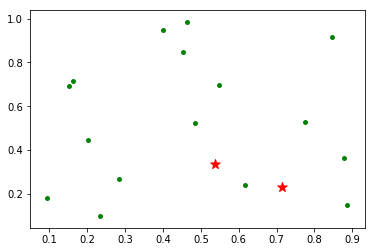

In [13]:
c3 = kmeans.cluster_centers_[0, :]
c4 = kmeans.cluster_centers_[1, :]

plt.scatter(f1, f2, c='green', s=15)

X = (list(zip(f1, f2)))

plt.scatter(c3, c4, marker='*',c='red',s=100)